In [36]:
import os
from os.path import dirname, abspath

import pandas as pd
import geopandas as gpd
import pygeos
import geoplot
import geoplot.crs as gcrs
import numpy as np

# from scipy.spatial import cKDTree

In [3]:
DATASET_FOLDER_PATH = os.path.join(dirname(abspath('')), 'data')

# source: https://catalogue.data.gov.bc.ca/dataset/fire-incident-locations-historical
HISTORICAL_FIRES_RAW_SOURCE = os.path.join(DATASET_FOLDER_PATH, 'PROT_HISTORICAL_INCIDENTS_SP.geojson')
# source: https://catalogue.data.gov.bc.ca/dataset/railway-track-line
RAILWAYS_RAW_SOURCE = os.path.join(DATASET_FOLDER_PATH, 'GBA_RAILWAY_TRACKS_SP.geojson')
# source: https://catalogue.data.gov.bc.ca/dataset/bc-designated-areas-points-1-2-000-000-digital-baseline-mapping
CAMPGROUNDS_RAW_SOURCE = os.path.join(DATASET_FOLDER_PATH, 'BC_MANMADE_POINTS_500M.geojson')


In [4]:
with open(HISTORICAL_FIRES_RAW_SOURCE) as file:
    df = gpd.read_file(file)

In [5]:
df = df[df.FIRE_CAUSE == 'Person']
display(df)

,FIRE_NUMBER,FIRE_YEAR,IGNITION_DATE,FIRE_CAUSE,FIRE_LABEL,FIRE_CENTRE,ZONE,FIRE_ID,FIRE_TYPE,GEOGRAPHIC_DESCRIPTION,LATITUDE,LONGITUDE,CURRENT_SIZE,FEATURE_CODE,OBJECTID,SE_ANNO_CAD_DATA,fme_feature_type,geometry
0,K50756,2013,20130818091300,Person,2013-K50756,5.0,5.0,500756,Nuisance Fire,Darke Lake,49.7118,-119.8661,0.009,JA70003000,14704564,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (-119.86608 49.71180)
7,K40034,2000,20000430150000,Person,2000-K40034,5.0,4.0,500034,Fire,1 Km South of Vernon,50.2110,-119.3833,0.010,JA70003000,14704619,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (-119.38333 50.21103)
8,V10252,2013,20130721144900,Person,2013-V10252,2.0,1.0,200252,Nuisance Fire,Chilliwack River 1 km Mark,49.1041,-121.6512,0.000,JA70003000,14704620,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (-121.65117 49.10413)
9,K20135,2003,20030705120000,Person,2003-K20135,5.0,2.0,500135,Fire,Isobel Lake,50.8369,-120.4142,0.100,JA70003000,14704621,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (-120.41417 50.83693)
10,K51159,2004,20040626102000,Person,2004-K51159,5.0,5.0,501159,Nuisance Fire,James Lake,49.9535,-119.2491,NaN,JA70003000,14704622,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (-119.24910 49.95350)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187114,K60162,1998,19980714,Person,1998-K60162,5.0,6.0,162,Fire,8 Km S of Princeton,49.4238,-120.5464,0.100,JA70003000,14888898,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (-120.54638 49.42380)
187115,K60164,1998,19980714,Person,1998-K60164,5.0,6.0,164,Fire,Lilly Lake Rd,50.0746,-120.8138,0.100,JA70003000,14888899,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (-120.81380 50.07458)
187116,K60172,1998,19980719,Person,1998-K60172,5.0,6.0,172,Fire,W. of Hedley,49.3728,-120.1402,0.200,JA70003000,14888900,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (-120.14015 49.37278)
187117,K60206,1998,19980727,Person,1998-K60206,5.0,6.0,206,Fire,Peterson Road,49.9568,-120.9268,0.100,JA70003000,14888901,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (-120.92678 49.95677)


In [6]:
with open(RAILWAYS_RAW_SOURCE) as file:
    railways_df = gpd.read_file(file)
display(railways_df)

,RAILWAY_TRACK_ID,NID,TRACK_SEGMENT_ID,TRACK_NAME,TRACK_CLASSIFICATION,REGULATOR,TRANSPORT_TYPE,USE_TYPE,GAUGE,NUMBER_OF_TRACKS,...,ATTRIBUTE_CREATION_DATE,ATTRIBUTE_REVISION_DATE,ATTRIBUTE_ACQUISITION_TECHNQUE,ATTRIBUTE_PROVIDER,OBJECTID,SE_ANNO_CAD_DATA,FEATURE_LENGTH_M,SHAPE.LEN,fme_feature_type,geometry
0,32,2d3aad84df1d4dc099bc5b4eb215980b,529c791850a143b0963735ba24ff0fe0,None,Yard,Unknown,Train,Freight,Standard,1,...,20131201,20170101,Vector Data,Federal,2200530,None,599.7485,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,"LINESTRING (-122.88502 49.23680, -122.88533 49..."
1,33,46a7b6be1d0c4b1090450f2b221844bd,0da02473327c4594b9eed7c3dec5e21e,Cranbrook,Yard,Unknown,Train,Freight,Standard,1,...,20131201,20170101,Vector Data,Federal,2200531,None,164.8002,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,"LINESTRING (-115.79600 49.49847, -115.79559 49..."
2,34,33a1254f55af46308eb3e568b25d27b8,84264d99fbf24c339e48c9821c391f76,None,Spur,Unknown,Train,Freight,Standard,1,...,20170101,20170101,Vector Data,Federal,2200532,None,552.6092,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,"LINESTRING (-122.26817 49.01137, -122.26820 49..."
3,35,d09b96659c43418fb7010f70cb3319e3,ddc213aabbc542a6a5cc4e8f748f6944,None,Yard,Unknown,Train,Freight,Standard,1,...,20131201,20170101,Vector Data,Federal,2200533,None,28.0812,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,"LINESTRING (-122.83434 49.21688, -122.83472 49..."
4,36,28e5539e1b1f416bbb1b3826bf2a5264,b48912aadaa54b69b7605dd8d29cbafe,Iris Spur No. 6007,Spur,Unknown,Train,Freight,Standard,1,...,20131201,20170101,Vector Data,Federal,2200534,None,491.9740,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,"LINESTRING (-115.80699 50.15382, -115.80806 50..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10039,9391,a6623c015bb64bcabb46f61564008c59,c046f29fea4345cb8ea0dc151b9e62e4,Yard Lead,Yard,Unknown,Train,Freight,Standard,1,...,20170101,20170101,Vector Data,Federal,2209881,None,421.2427,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,"LINESTRING (-116.95783 51.28794, -116.95678 51..."
10040,9392,53f0a3076a424a3c932c6f457c501225,a104164a4ddd4dc7b9859ae3cd4c5b0e,None,Main,Unknown,Train,Freight and Tourist,Standard,1,...,20131201,20170101,Vector Data,Federal,2209882,None,110.0708,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,"LINESTRING (-122.74817 53.88362, -122.74818 53..."
10041,9393,feb8fc60c2f44c82aad7d84cdf8411a1,c0b41508cdad45c8a1d3b98c04ecb15f,Morice Town,Siding,Unknown,Train,Freight and Passenger,Standard,1,...,20170101,20170101,Vector Data,Federal,2209883,None,2349.0872,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,"LINESTRING (-127.34197 55.03751, -127.34112 55..."
10042,9394,ea5734d66dd34e849f5635f3fc458c9d,0c0c61b58c9f4112b18a36c63217ba93,LE40 Runaround,Siding,Unknown,Train,Freight,Standard,1,...,20170101,20170101,Vector Data,Federal,2209884,None,402.4594,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,"LINESTRING (-119.03470 50.23469, -119.03396 50..."


In [7]:
with open(CAMPGROUNDS_RAW_SOURCE) as file:
    campgrounds_df = gpd.read_file(file)
display(campgrounds_df)

,FCODE,OBJECTID,SE_ANNO_CAD_DATA,fme_feature_type,geometry
0,AR03400000,1,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,POINT (-127.51025 50.41495)
1,AR03400000,2,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,POINT (-126.91130 50.57972)
2,AR03400000,3,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,POINT (-125.97142 50.34524)
3,AR03400000,4,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,POINT (-126.80958 49.97269)
4,AR03400000,5,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,POINT (-126.68795 49.92705)
...,...,...,...,...,...
687,BF01850000,688,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,POINT (-126.69496 49.89813)
688,BF01850000,689,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,POINT (-126.16361 49.68631)
689,BF01850000,690,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,POINT (-125.51993 48.95512)
690,BF01850000,691,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,POINT (-125.11059 48.82036)


In [8]:
railways_df['geometry'] = railways_df['geometry'].to_crs(epsg=3005)
campgrounds_df['geometry'] = campgrounds_df['geometry'].to_crs(epsg=3005)
df['geometry'] = df['geometry'].to_crs(epsg=3005)

railways_df.drop(columns=['TRACK_SEGMENT_ID'], inplace=True)

fires_and_railways = df.sjoin_nearest(railways_df, distance_col="distance_to_railway")
# distance is in metres
display(fires_and_railways)

,FIRE_NUMBER,FIRE_YEAR,IGNITION_DATE,FIRE_CAUSE,FIRE_LABEL,FIRE_CENTRE,ZONE,FIRE_ID,FIRE_TYPE,GEOGRAPHIC_DESCRIPTION,...,ATTRIBUTE_CREATION_DATE,ATTRIBUTE_REVISION_DATE,ATTRIBUTE_ACQUISITION_TECHNQUE,ATTRIBUTE_PROVIDER,OBJECTID_right,SE_ANNO_CAD_DATA_right,FEATURE_LENGTH_M,SHAPE.LEN,fme_feature_type_right,distance_to_railway
0,K50756,2013,20130818091300,Person,2013-K50756,5.0,5.0,500756,Nuisance Fire,Darke Lake,...,20170101,20170101,Vector Data,Federal,2201495,None,6229.0755,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,72064.983578
7,K40034,2000,20000430150000,Person,2000-K40034,5.0,4.0,500034,Fire,1 Km South of Vernon,...,20170101,20170101,Vector Data,Federal,2201495,None,6229.0755,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,8556.660382
10,K51159,2004,20040626102000,Person,2004-K51159,5.0,5.0,501159,Nuisance Fire,James Lake,...,20170101,20170101,Vector Data,Federal,2201495,None,6229.0755,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,30304.105911
88,K51091,2007,20070807110300,Person,2007-K51091,5.0,5.0,501091,Nuisance Fire,Jack Pine Lake,...,20170101,20170101,Vector Data,Federal,2201495,None,6229.0755,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,51843.547893
127,K40748,2005,20050814080000,Person,2005-K40748,5.0,4.0,500748,Nuisance Fire,Coldstream Creek,...,20170101,20170101,Vector Data,Federal,2201495,None,6229.0755,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,340.033574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186735,V30013,1997,19970519,Person,1997-V30013,2.0,3.0,13,Fire,None,...,20131201,20170101,Vector Data,Federal,2200920,None,388.6699,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,538.781037
185108,K20624,1998,19980827,Person,1998-K20624,5.0,2.0,624,Fire,Bachelor Hill,...,20170101,20170101,Vector Data,Federal,2207550,None,176.2591,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,1712.200404
185429,K70173,1997,19970807,Person,1997-K70173,5.0,7.0,173,Fire,None,...,20170101,20170101,Vector Data,Federal,2207865,None,446.4215,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,1.751489
185487,G10260,1998,19980723,Person,1998-G10260,4.0,1.0,260,Fire,Gunn Road,...,20131201,20170101,Vector Data,Federal,2208820,None,330.2362,0,WHSE_BASEMAPPING.GBA_RAILWAY_TRACKS_SP,1703.814088


In [9]:
print(fires_and_railways['distance_to_railway'].max())
print(fires_and_railways['distance_to_railway'].min())

775833.8000947315
0.03650992931506413


In [10]:
fires_and_campgrounds = df.sjoin_nearest(campgrounds_df, distance_col="distance_to_campground")
# distance is in metres
display(fires_and_campgrounds)

,FIRE_NUMBER,FIRE_YEAR,IGNITION_DATE,FIRE_CAUSE,FIRE_LABEL,FIRE_CENTRE,ZONE,FIRE_ID,FIRE_TYPE,GEOGRAPHIC_DESCRIPTION,...,OBJECTID_left,SE_ANNO_CAD_DATA_left,fme_feature_type_left,geometry,index_right,FCODE,OBJECTID_right,SE_ANNO_CAD_DATA_right,fme_feature_type_right,distance_to_campground
0,K50756,2013,20130818091300,Person,2013-K50756,5.0,5.0,500756,Nuisance Fire,Darke Lake,...,14704564,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (1441999.283 540895.092),23,AR03400000,24,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,11887.292907
88,K51091,2007,20070807110300,Person,2007-K51091,5.0,5.0,501091,Nuisance Fire,Jack Pine Lake,...,14704700,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (1444401.193 564285.394),23,AR03400000,24,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,14726.527466
790,K51224,2007,20070818162200,Person,2007-K51224,5.0,5.0,501224,Nuisance Fire,Brenda Lake,...,14705302,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (1427740.912 558812.744),23,AR03400000,24,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,23056.037063
1058,K51245,2008,20080804121700,Person,2008-K51245,5.0,5.0,501245,Nuisance Fire,Darke lk,...,14705921,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (1441906.867 540916.863),23,AR03400000,24,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,11926.188850
1193,K50500,2000,20000806210000,Person,2000-K50500,5.0,5.0,500500,Nuisance Fire,Headwaters Lake,...,14705903,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (1431385.728 551686.692),23,AR03400000,24,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,17855.147589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159457,R50021,1990,19900709,Person,1990-R50021,3.0,5.0,21,Fire,None,...,14869515,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (750774.389 1220959.466),626,AR03400000,627,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,1326.225736
159459,R50023,1990,19900707,Person,1990-R50023,3.0,5.0,23,Fire,None,...,14869517,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (751646.192 1220910.264),626,AR03400000,627,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,1262.156966
167497,R50014,1993,19930727,Person,1993-R50014,3.0,5.0,14,Fire,None,...,14878089,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (751640.435 1221916.668),626,AR03400000,627,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,349.681613
139481,R80006,1982,19820820,Person,1982-R80006,3.0,8.0,6,Fire,None,...,14847558,None,WHSE_LAND_AND_NATURAL_RESOURCE.PROT_HISTORICAL...,POINT (751801.207 1219224.734),628,BF01850000,629,None,WHSE_BASEMAPPING.BC_MANMADE_POINTS_500M,784.534763


In [11]:
print(fires_and_campgrounds['distance_to_campground'].max())
print(fires_and_campgrounds['distance_to_campground'].min())

588069.2961779325
18.93798030414798


In [12]:
print('fires_and_campgrounds')
print(list(fires_and_campgrounds))
print('\n')
print('fires_and_railways')
print(list(fires_and_railways))

fires_and_campgrounds
['FIRE_NUMBER', 'FIRE_YEAR', 'IGNITION_DATE', 'FIRE_CAUSE', 'FIRE_LABEL', 'FIRE_CENTRE', 'ZONE', 'FIRE_ID', 'FIRE_TYPE', 'GEOGRAPHIC_DESCRIPTION', 'LATITUDE', 'LONGITUDE', 'CURRENT_SIZE', 'FEATURE_CODE', 'OBJECTID_left', 'SE_ANNO_CAD_DATA_left', 'fme_feature_type_left', 'geometry', 'index_right', 'FCODE', 'OBJECTID_right', 'SE_ANNO_CAD_DATA_right', 'fme_feature_type_right', 'distance_to_campground']


fires_and_railways
['FIRE_NUMBER', 'FIRE_YEAR', 'IGNITION_DATE', 'FIRE_CAUSE', 'FIRE_LABEL', 'FIRE_CENTRE', 'ZONE', 'FIRE_ID', 'FIRE_TYPE', 'GEOGRAPHIC_DESCRIPTION', 'LATITUDE', 'LONGITUDE', 'CURRENT_SIZE', 'FEATURE_CODE', 'OBJECTID_left', 'SE_ANNO_CAD_DATA_left', 'fme_feature_type_left', 'geometry', 'index_right', 'RAILWAY_TRACK_ID', 'NID', 'TRACK_NAME', 'TRACK_CLASSIFICATION', 'REGULATOR', 'TRANSPORT_TYPE', 'USE_TYPE', 'GAUGE', 'NUMBER_OF_TRACKS', 'ELECTRIFICATION', 'STATUS', 'DESIGN_SPEED_FREIGHT', 'DESIGN_SPEED_PASSENGER', 'SOURCE_ID', 'OPERATOR_ENGLISH_NAME', 'O

In [13]:
# drop useless columns that are getting in the way
fires_and_campgrounds.drop(columns=['FEATURE_CODE', 'OBJECTID_left', 'SE_ANNO_CAD_DATA_left', 'fme_feature_type_left', 'index_right', 'FCODE', 'OBJECTID_right', 'SE_ANNO_CAD_DATA_right', 'fme_feature_type_right'], inplace=True)
fires_and_railways.drop(columns=['FIRE_YEAR', 'IGNITION_DATE', 'FIRE_CAUSE', 'FIRE_NUMBER', 'FIRE_CENTRE', 'ZONE', 'FIRE_ID', 'FIRE_TYPE', 'GEOGRAPHIC_DESCRIPTION', 'LATITUDE', 'LONGITUDE', 'CURRENT_SIZE', 'FEATURE_CODE', 'OBJECTID_left', 'SE_ANNO_CAD_DATA_left', 'fme_feature_type_left', 'index_right', 'NID', 'SOURCE_ID', 'SUBDIVISION1_NID', 'SUBDIVISION1_START', 'SUBDIVISION1_END', 'SUBDIVISION2_NID', 'SUBDIVISION2_NAME', 'SUBDIVISION2_START', 'SUBDIVISION2_END', 'STANDARDS_VERSION', 'GEOMETRY_CREATION_DATE', 'GEOMETRY_REVISION_DATE', 'GEOMETRY_ACQUISITION_TECHNQUE', 'GEOMETRY_PLANIMETRIC_ACCURACY', 'GEOMETRY_PROVIDER', 'ATTRIBUTE_CREATION_DATE', 'ATTRIBUTE_REVISION_DATE', 'ATTRIBUTE_ACQUISITION_TECHNQUE', 'ATTRIBUTE_PROVIDER', 'SE_ANNO_CAD_DATA_right', 'FEATURE_LENGTH_M', 'SHAPE.LEN', 'fme_feature_type_right', 'TRACK_USER1_ENGLISH_NAME', 'TRACK_USER2_ENGLISH_NAME', 'TRACK_USER3_ENGLISH_NAME', 'TRACK_USER4_ENGLISH_NAME', 'ADMINISTRATIVE_AREA', 'SECURITY_CLASSIFICATION', 'OBJECTID_right', 'ELECTRIFICATION', 'DESIGN_SPEED_FREIGHT', 'DESIGN_SPEED_PASSENGER', 'OPERATOR_SUBDIV_PORTION_END', 'OPERATOR_SUBDIV_PORTION_START', 'REGULATOR', 'TRANSPORT_TYPE', 'GAUGE', 'NUMBER_OF_TRACKS', 'TRACK_NAME'], inplace=True)

In [14]:
print('fires_and_campgrounds')
print(list(fires_and_campgrounds))
print('\n')
print('fires_and_railways')
print(list(fires_and_railways))

fires_and_campgrounds
['FIRE_NUMBER', 'FIRE_YEAR', 'IGNITION_DATE', 'FIRE_CAUSE', 'FIRE_LABEL', 'FIRE_CENTRE', 'ZONE', 'FIRE_ID', 'FIRE_TYPE', 'GEOGRAPHIC_DESCRIPTION', 'LATITUDE', 'LONGITUDE', 'CURRENT_SIZE', 'geometry', 'distance_to_campground']


fires_and_railways
['FIRE_LABEL', 'geometry', 'RAILWAY_TRACK_ID', 'TRACK_CLASSIFICATION', 'USE_TYPE', 'STATUS', 'OPERATOR_ENGLISH_NAME', 'OWNER_NAME', 'SUBDIVISION1_NAME', 'distance_to_railway']


In [15]:
enhanced_df = pd.merge(fires_and_campgrounds, fires_and_railways, how='inner', on='FIRE_LABEL')
display(enhanced_df)

,FIRE_NUMBER,FIRE_YEAR,IGNITION_DATE,FIRE_CAUSE,FIRE_LABEL,FIRE_CENTRE,ZONE,FIRE_ID,FIRE_TYPE,GEOGRAPHIC_DESCRIPTION,...,distance_to_campground,geometry_y,RAILWAY_TRACK_ID,TRACK_CLASSIFICATION,USE_TYPE,STATUS,OPERATOR_ENGLISH_NAME,OWNER_NAME,SUBDIVISION1_NAME,distance_to_railway
0,K50756,2013,20130818091300,Person,2013-K50756,5.0,5.0,500756,Nuisance Fire,Darke Lake,...,11887.292907,POINT (1441999.283 540895.092),997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,72064.983578
1,K51091,2007,20070807110300,Person,2007-K51091,5.0,5.0,501091,Nuisance Fire,Jack Pine Lake,...,14726.527466,POINT (1444401.193 564285.394),997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,51843.547893
2,K51224,2007,20070818162200,Person,2007-K51224,5.0,5.0,501224,Nuisance Fire,Brenda Lake,...,23056.037063,POINT (1427740.912 558812.744),997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,67690.422426
3,K51245,2008,20080804121700,Person,2008-K51245,5.0,5.0,501245,Nuisance Fire,Darke lk,...,11926.188850,POINT (1441906.867 540916.863),997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,72094.615876
4,K50500,2000,20000806210000,Person,2000-K50500,5.0,5.0,500500,Nuisance Fire,Headwaters Lake,...,17855.147589,POINT (1431385.728 551686.692),997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,69934.984599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101689,R50021,1990,19900709,Person,1990-R50021,3.0,5.0,21,Fire,None,...,1326.225736,POINT (750774.389 1220959.466),7354,Siding,Freight and Passenger,Operational,Canadian National,Canadian National,Bulkley,145616.635454
101690,R50023,1990,19900707,Person,1990-R50023,3.0,5.0,23,Fire,None,...,1262.156966,POINT (751646.192 1220910.264),7354,Siding,Freight and Passenger,Operational,Canadian National,Canadian National,Bulkley,144980.983924
101691,R50014,1993,19930727,Person,1993-R50014,3.0,5.0,14,Fire,None,...,349.681613,POINT (751640.435 1221916.668),7354,Siding,Freight and Passenger,Operational,Canadian National,Canadian National,Bulkley,145718.173744
101692,R80006,1982,19820820,Person,1982-R80006,3.0,8.0,6,Fire,None,...,784.534763,POINT (751801.207 1219224.734),7354,Siding,Freight and Passenger,Operational,Canadian National,Canadian National,Bulkley,143653.020977


In [16]:
print(list(enhanced_df))

['FIRE_NUMBER', 'FIRE_YEAR', 'IGNITION_DATE', 'FIRE_CAUSE', 'FIRE_LABEL', 'FIRE_CENTRE', 'ZONE', 'FIRE_ID', 'FIRE_TYPE', 'GEOGRAPHIC_DESCRIPTION', 'LATITUDE', 'LONGITUDE', 'CURRENT_SIZE', 'geometry_x', 'distance_to_campground', 'geometry_y', 'RAILWAY_TRACK_ID', 'TRACK_CLASSIFICATION', 'USE_TYPE', 'STATUS', 'OPERATOR_ENGLISH_NAME', 'OWNER_NAME', 'SUBDIVISION1_NAME', 'distance_to_railway']


In [17]:
# drop duplicate column
enhanced_df.drop(columns=['geometry_y'], inplace=True)
enhanced_df.rename(columns={'geometry_x': 'geometry'}, inplace=True)
print(enhanced_df.iloc[0])

FIRE_NUMBER                                                     K50756
FIRE_YEAR                                                         2013
IGNITION_DATE                                           20130818091300
FIRE_CAUSE                                                      Person
FIRE_LABEL                                                2013-K50756 
FIRE_CENTRE                                                        5.0
ZONE                                                               5.0
FIRE_ID                                                         500756
FIRE_TYPE                                                Nuisance Fire
GEOGRAPHIC_DESCRIPTION                                      Darke Lake
LATITUDE                                                       49.7118
LONGITUDE                                                    -119.8661
CURRENT_SIZE                                                     0.009
geometry                  POINT (1441999.2830000003 540895.0921999908)
distan

In [18]:
def convert_to_datetime(timestring: str):
    if timestring is None:
        return None
    if len(timestring) == 8:
        return pd.to_datetime(timestring, format='%Y%m%d')
    elif len(timestring) == 14:
        return pd.to_datetime(timestring, format='%Y%m%d%H%M%S')
    else:
        return None

In [19]:
# convert IGNITION_DATE column (YYYYMMDDHHMMSS) to pandas datetime object
enhanced_df['DATETIME'] = enhanced_df['IGNITION_DATE'].apply(convert_to_datetime)
enhanced_df.drop(columns=['IGNITION_DATE'], inplace=True)


enhanced_df.head()

,FIRE_NUMBER,FIRE_YEAR,FIRE_CAUSE,FIRE_LABEL,FIRE_CENTRE,ZONE,FIRE_ID,FIRE_TYPE,GEOGRAPHIC_DESCRIPTION,LATITUDE,...,distance_to_campground,RAILWAY_TRACK_ID,TRACK_CLASSIFICATION,USE_TYPE,STATUS,OPERATOR_ENGLISH_NAME,OWNER_NAME,SUBDIVISION1_NAME,distance_to_railway,DATETIME
0,K50756,2013,Person,2013-K50756,5.0,5.0,500756,Nuisance Fire,Darke Lake,49.7118,...,11887.292907,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,72064.983578,2013-08-18 09:13:00
1,K51091,2007,Person,2007-K51091,5.0,5.0,501091,Nuisance Fire,Jack Pine Lake,49.9195,...,14726.527466,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,51843.547893,2007-08-07 11:03:00
2,K51224,2007,Person,2007-K51224,5.0,5.0,501224,Nuisance Fire,Brenda Lake,49.8833,...,23056.037063,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,67690.422426,2007-08-18 16:22:00
3,K51245,2008,Person,2008-K51245,5.0,5.0,501245,Nuisance Fire,Darke lk,49.7121,...,11926.188850,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,72094.615876,2008-08-04 12:17:00
4,K50500,2000,Person,2000-K50500,5.0,5.0,500500,Nuisance Fire,Headwaters Lake,49.8167,...,17855.147589,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,69934.984599,2000-08-06 21:00:00


In [20]:
# add column indicating which day of week fire incident occurred
enhanced_df['DAY_OF_WEEK'] = enhanced_df['DATETIME'].dt.dayofweek
# 0 = Monday, 6 = Sunday

enhanced_df.head()

,FIRE_NUMBER,FIRE_YEAR,FIRE_CAUSE,FIRE_LABEL,FIRE_CENTRE,ZONE,FIRE_ID,FIRE_TYPE,GEOGRAPHIC_DESCRIPTION,LATITUDE,...,RAILWAY_TRACK_ID,TRACK_CLASSIFICATION,USE_TYPE,STATUS,OPERATOR_ENGLISH_NAME,OWNER_NAME,SUBDIVISION1_NAME,distance_to_railway,DATETIME,DAY_OF_WEEK
0,K50756,2013,Person,2013-K50756,5.0,5.0,500756,Nuisance Fire,Darke Lake,49.7118,...,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,72064.983578,2013-08-18 09:13:00,6.0
1,K51091,2007,Person,2007-K51091,5.0,5.0,501091,Nuisance Fire,Jack Pine Lake,49.9195,...,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,51843.547893,2007-08-07 11:03:00,1.0
2,K51224,2007,Person,2007-K51224,5.0,5.0,501224,Nuisance Fire,Brenda Lake,49.8833,...,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,67690.422426,2007-08-18 16:22:00,5.0
3,K51245,2008,Person,2008-K51245,5.0,5.0,501245,Nuisance Fire,Darke lk,49.7121,...,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,72094.615876,2008-08-04 12:17:00,0.0
4,K50500,2000,Person,2000-K50500,5.0,5.0,500500,Nuisance Fire,Headwaters Lake,49.8167,...,997,Main,Freight,Operational,Canadian National,Canadian National,Lumby,69934.984599,2000-08-06 21:00:00,6.0


In [21]:
enhanced_df.to_file(os.path.join(DATASET_FOLDER_PATH, "historical_fires_extra_features.geojson"), driver='GeoJSON')

/Users/awilliam/Desktop/wps/api/.venv/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


<AxesSubplot:>

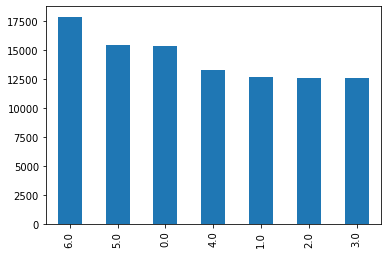

In [22]:
enhanced_df['DAY_OF_WEEK'].value_counts().plot(kind='bar')
# 6,5,0,4,1,2,3 = Sunday, Saturday, Monday, Friday, Tuesday, Wednesday, Thursday

In [24]:
print(list(enhanced_df))

['FIRE_NUMBER', 'FIRE_YEAR', 'FIRE_CAUSE', 'FIRE_LABEL', 'FIRE_CENTRE', 'ZONE', 'FIRE_ID', 'FIRE_TYPE', 'GEOGRAPHIC_DESCRIPTION', 'LATITUDE', 'LONGITUDE', 'CURRENT_SIZE', 'geometry', 'distance_to_campground', 'RAILWAY_TRACK_ID', 'TRACK_CLASSIFICATION', 'USE_TYPE', 'STATUS', 'OPERATOR_ENGLISH_NAME', 'OWNER_NAME', 'SUBDIVISION1_NAME', 'distance_to_railway', 'DATETIME', 'DAY_OF_WEEK']


<AxesSubplot:>

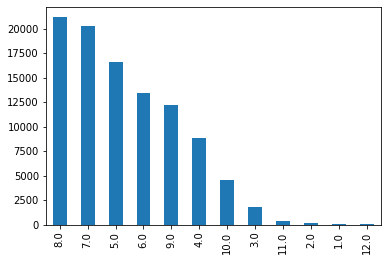

In [25]:
enhanced_df['MONTH'] = enhanced_df['DATETIME'].dt.month

enhanced_df['MONTH'].value_counts().plot(kind='bar')

In [38]:
# fire starts that were < 2 km from a campground
idx = np.where((enhanced_df['distance_to_campground'] < 2000) & (enhanced_df['FIRE_TYPE'] == 'Fire'))

<AxesSubplot:>

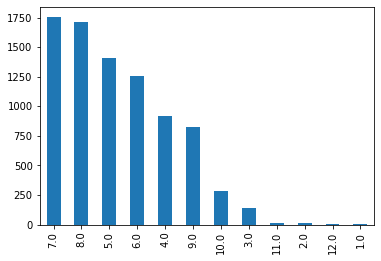

In [39]:
near_campground = enhanced_df.iloc[idx]
near_campground['MONTH'].value_counts().plot(kind='bar')

<AxesSubplot:>

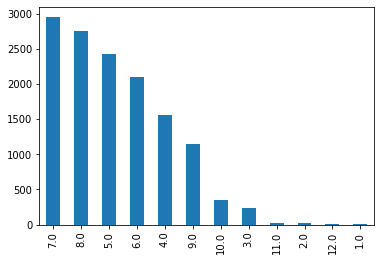

In [40]:
# fire starts that were < 1 km from a railway
idx = np.where((enhanced_df['distance_to_railway'] < 1000) & (enhanced_df['FIRE_TYPE'] == 'Fire'))
near_railway = enhanced_df.iloc[idx]
near_railway['MONTH'].value_counts().plot(kind='bar')